### Opgaver U5

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop
np.set_printoptions(legacy='1.25')

#### E3.4 and E3.12 on Hypothosis testing ####

#### E3.4

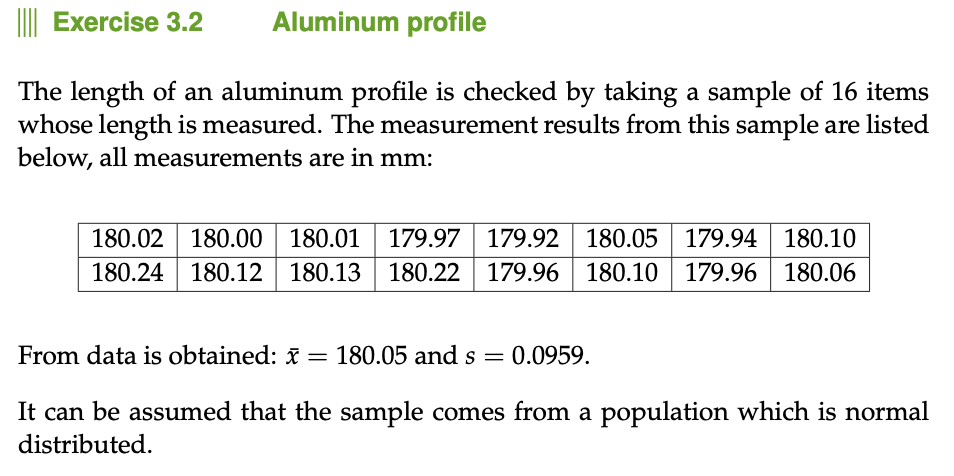

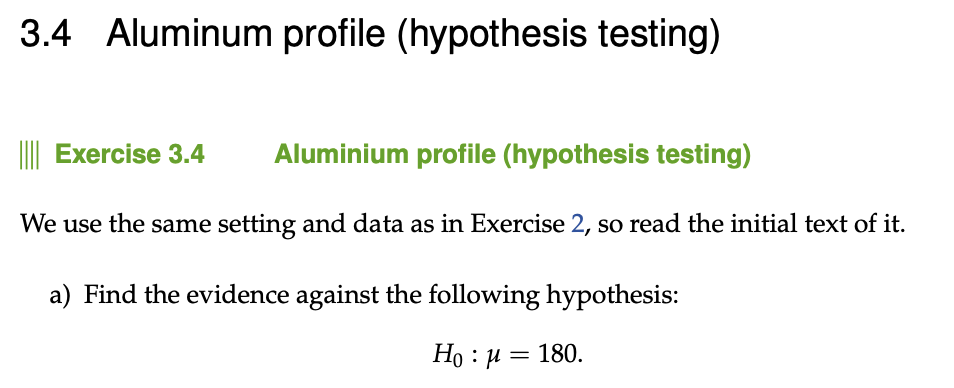

$$ H_0 : \mu = 180$$
$$ H_A : \mu \neq 180$$

We choose the significance level $\alpha$ = 0.05

In [29]:
# parameters
alpha = 0.05 # significance level
# Given data
sample_mean = 180.05 # sample mean
mu0 = 180 # null hypothesis mean
std = 0.0959 # standard deviation
n = 16 # sample size


t_obs = (sample_mean - mu0) / (std / (np.sqrt(n))) # observed t-statistic
print("t_obs =",t_obs)

p_value = 2 * (stats.t.sf(abs(t_obs), df=n-1)) # two-tailed p-value
print("p_value =",p_value)


t_obs = 2.085505735141246
p_value = 0.05452040573484679


We accept $H_0$ under $\alpha = 0.05$

This can oc also be done using specific functions

Slight difference in result is due to innacurracies in the computations

In [30]:
x = np.array([180.02, 180.00, 180.01, 179.97, 179.92, 180.05, 179.94,
180.10, 180.24, 180.12, 180.13, 180.22, 179.96, 180.10, 179.96, 180.06])
t_obs,p_val = stats.ttest_1samp(x,popmean=180)
print("t_obs =",t_obs,","," p_val =",p_val)

t_obs = 2.085144140571199 ,  p_val = 0.05455742828541606


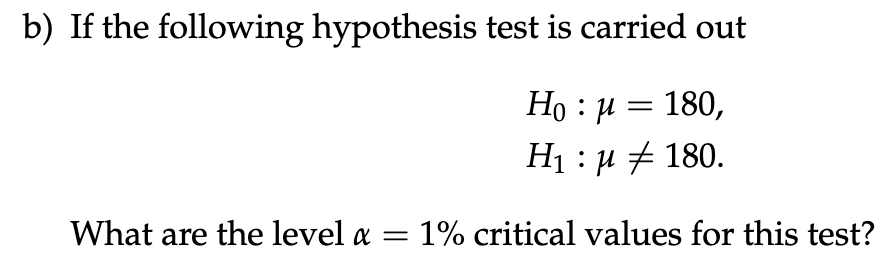

In [31]:
alpha = 0.01
# Critical values are t_alpha/2 and t_1-alpha/2
crit_values = (stats.t.ppf(alpha/2, df=n-1), stats.t.ppf(1 - alpha/2, df=n-1))
crit_values

(-2.9467128834859504, 2.9467128834859504)

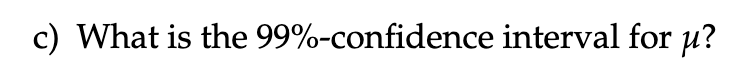

In [32]:
(CI_low,CI_high) = stats.ttest_1samp(x, popmean=mu0).confidence_interval(confidence_level=0.99)
print(CI_low,CI_high)

179.97934030731614 180.1206596926839


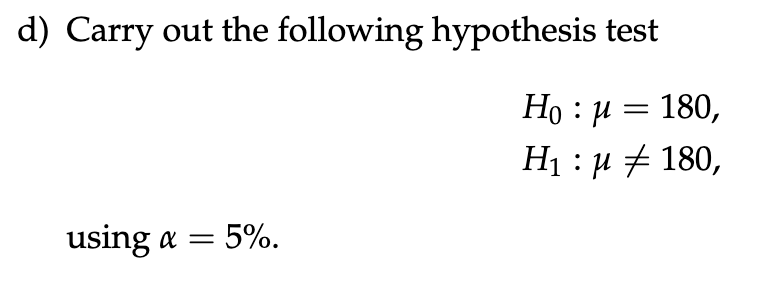

In [33]:
if p_value < alpha:
    print("We reject the null hypothesis of µ= 180")
else:
    print("We cannot reject the null hypothesis of µ= 180")

We cannot reject the null hypothesis of µ= 180


### E3.12 ###

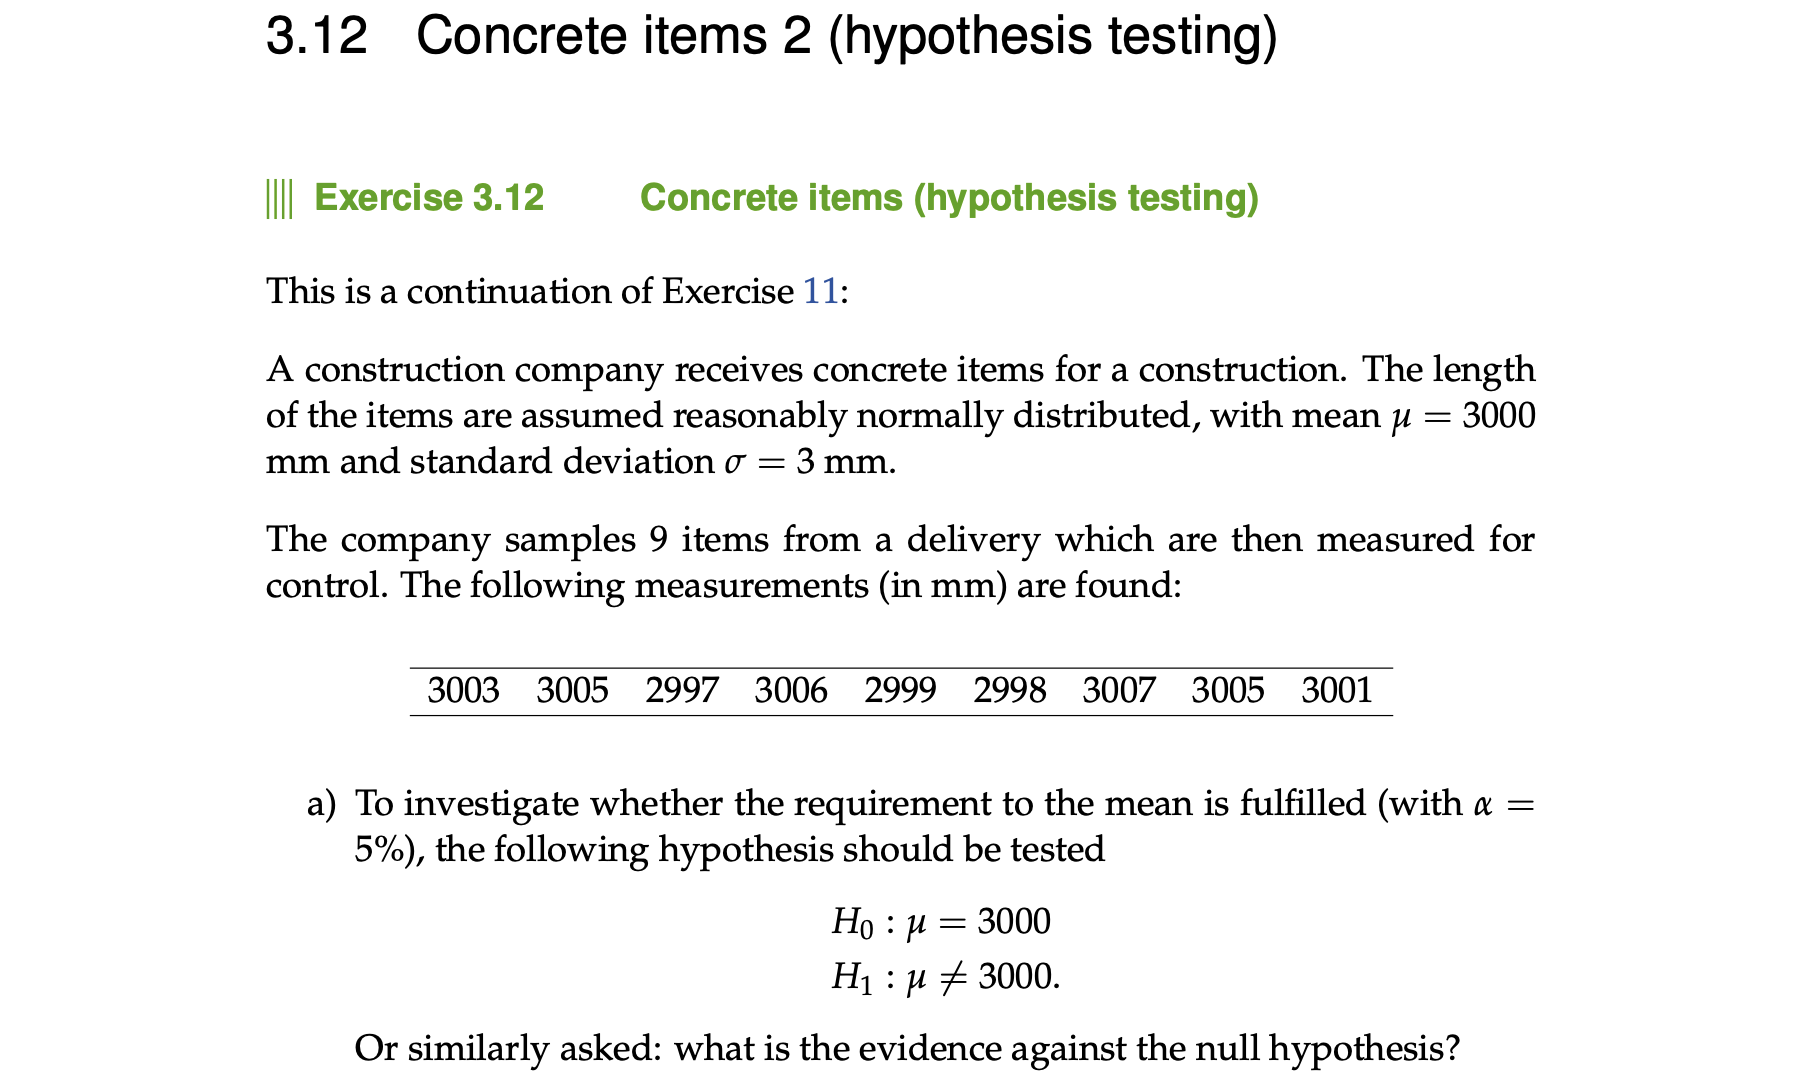

In [34]:
x = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])

t_obs,p_val = stats.ttest_1samp(x,popmean=3000)
print("t_obs =",t_obs,"p_value =",p_val)

t_obs = 1.8877596148972005 p_value = 0.09575551807233935


Conclusion: There is a "weak evidence against the null-hypothesis" (see table 3.1),
and using a significance level α of 0.05 the null hypothesis is not rejected.

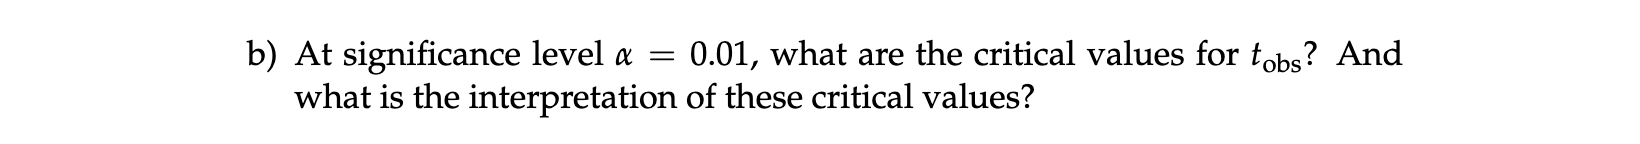

In [35]:
alpha = 0.01
print(stats.t.ppf(1 - alpha/2, df=n-1))

2.9467128834859504


This means that (for a sample of size n = 9), the calculated t_obs, must be either larger
than 3.355 or smaller than −3.355 to lead to a significant result at significance level
α = 0.01.

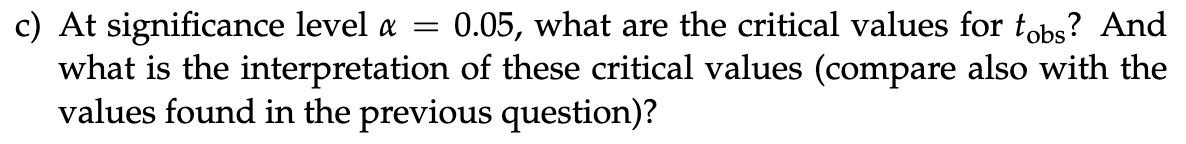

In [36]:
alpha = 0.05
print(stats.t.ppf(1 - alpha/2, df=n-1))

2.131449545559323


This means that (for a sample of size n = 9), the calculated t_obs, must be either larger
than 2.306 or smaller than −2.306 to lead to a significant result at significance level α = 0.05

Compared to the previous critical values we se that a smaller significance level is related to larger (absolute values of) critical values. When choosing a smaller significance level. we demand the observed t_obs to be "more extreme" before we decide to reject the null hypothesis.

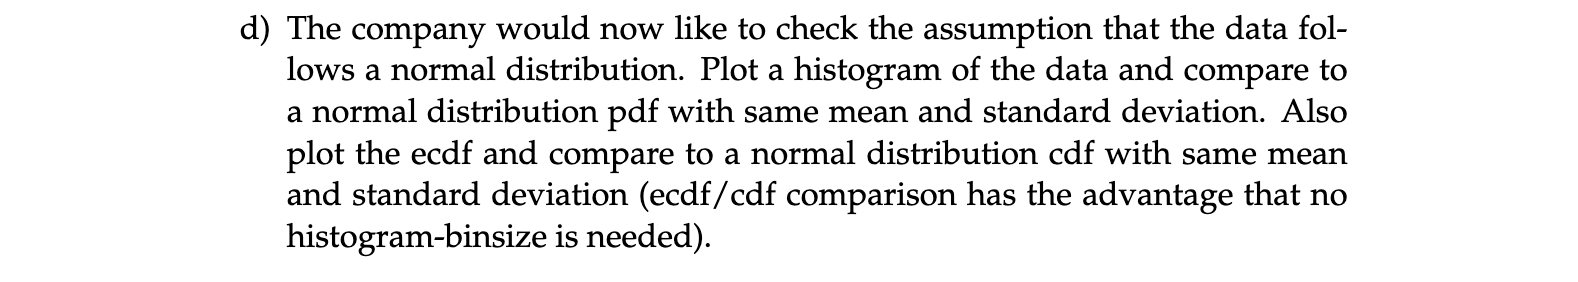

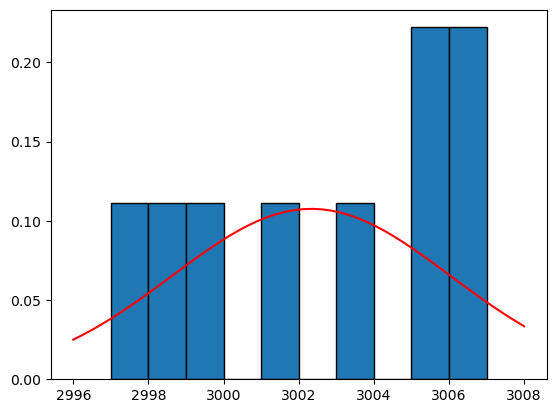

In [37]:
plt.hist(x, edgecolor= "black" ,density=True)
# add normal curve
x_values = np.linspace(2996, 3008)
pdf_values = stats.norm.pdf(x_values, loc=x.mean(),
scale=x.std(ddof=1))
plt.plot(x_values, pdf_values, color="red")
plt.show()

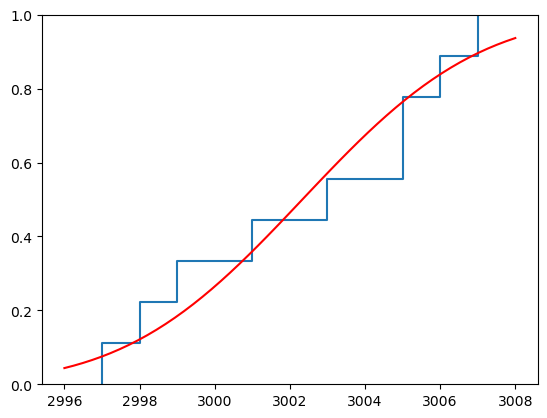

In [38]:
plt.ecdf(x)
# add normal curve
x_values = np.linspace(2996, 3008)
cdf_values = stats.norm.cdf(x_values, loc=x.mean(),
scale=x.std(ddof=1))
plt.plot(x_values, cdf_values, color="red")
plt.show()

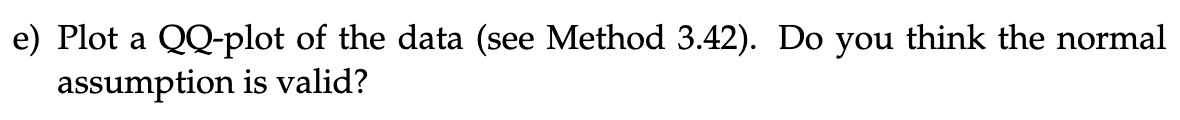

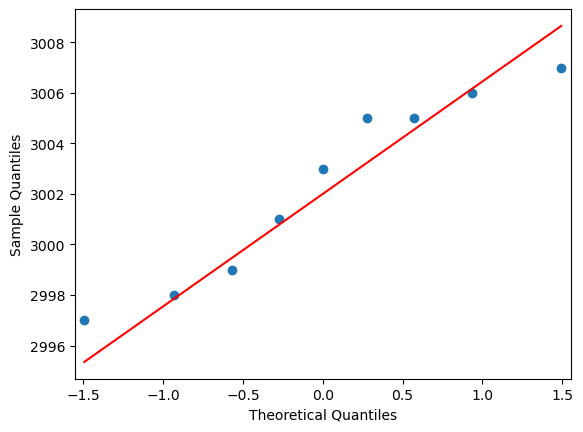

In [41]:
sm.qqplot(x, line ="q",a=3/8)
plt.show()      

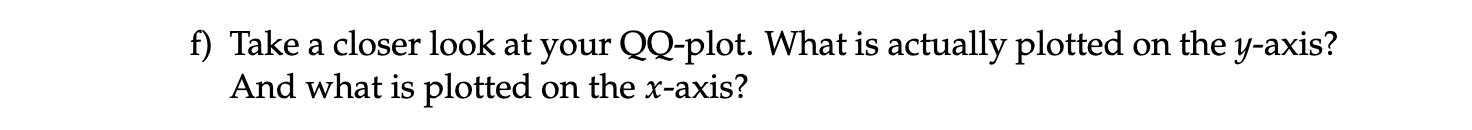

The values plotted along the y-axis are the (sorted) values in the sample $(y_i =
\{2997, 2998, 2999, 3001, 3003, 3005, 3005, 3006, 3007\})$.
Each value in the sample represents $1/9$’th of the total dataset (there are 9 data-
points in total). Looking at Method 3.42, we see that the usual definition of $p_i$
for datapoint number $i$ is $p_i = (i−0.5)/n$, so for our dataset this would be:
$p_i = \{0.5/9, 1.5/9, 2.5/9, 3.5/9, 4.5/9, 5.5/9, 6.5/9, 7.5/9, 8.5/9\}$.
The usual values to be plotted on the x-axis are the corresponding quantiles in
a standard normal distribution. These values can be computed in Python as
stats.norm.ppf($p_i$), and are visualized in the following plot (of the Standard normal cdf):

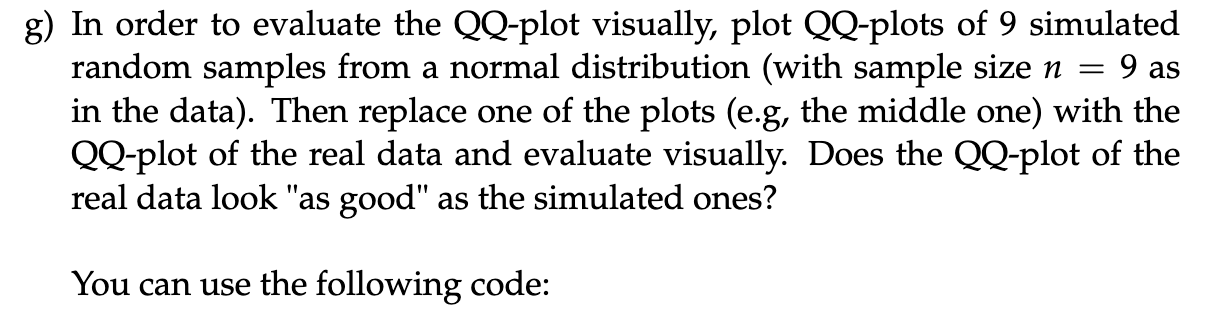

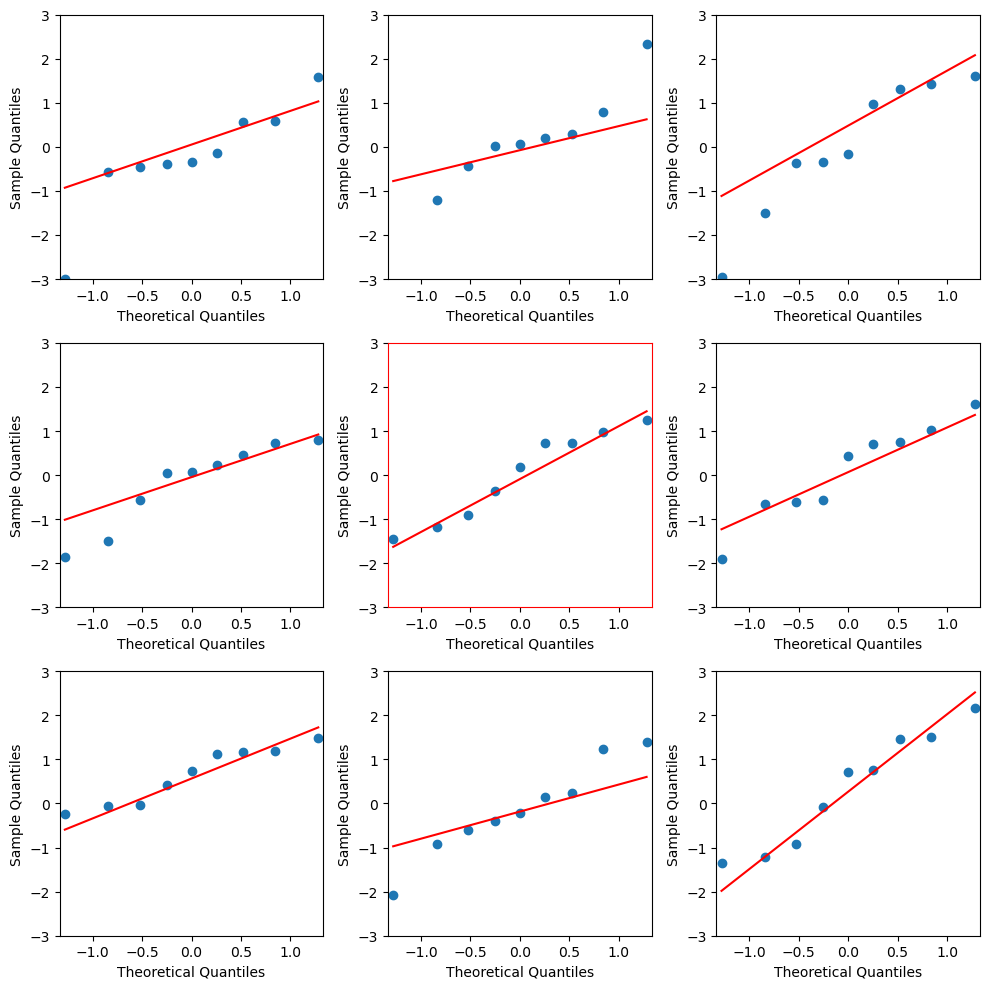

In [42]:
# Enter data into variable x:
x = np.array([3003,3005,2997,3006,2999,2998,3007,3005,3001])
# Generate 9 plots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# Create 9 QQ plots of random normal samples
for ax in axs.flat:
    sm.qqplot(stats.norm.rvs(size=9), line="q", ax=ax)
    ax.set_ylim([-3, 3])
# Replace middle plot with real data
axs[1,1].clear()
sm.qqplot((x - x.mean())/x.std(ddof=1), line="q", ax=axs[1,1])
axs[1,1].set_ylim([-3, 3])
# Highlight middle plot with red spines
plt.setp(axs[1,1].spines.values(), color="red")
# Generate the plot
plt.tight_layout()
plt.show()